# Homework 4: Implied Volatility and Heston Model Calibration

<p style="text-align: left; font-size: 18pt; color: orange;">
    <i>Done by<br>Maksim Kuptsov, DSBA231</i>
</p>

# **Block 1: Theory**


$\textcolor{lightblue}{\textbf{Q1. (1.5 points)}}$

(a) Define implied volatility $\sigma_{\text{imp}}(K,T)$ precisely. Explain why it is called "implied" and discuss whether it can be observed directly in the market.  

(b) Explain the concept of vega in the Black–Scholes model. Derive the expression for vega and explain why positive vega guarantees the existence of a unique implied volatility for each option price (assuming $T > 0$ and the option is not deep in-the-money or out-of-the-money).  

(c) Briefly describe the Newton–Raphson method for computing implied volatility from a given market option price. What role does vega play in this algorithm?

$\textcolor{green}{\textbf{Solution}}$

**(a)**

Implied volatility $\hspace{1mm} \sigma_{\text{imp}}(K,T) \hspace{1mm}$ is the value of volatility that makes Black–Scholes option-pricing model match the observed market price of the option, that is
$$
V_\text{BS}(S_0, K, T, \sigma_\text{imp}) = V_\text{mkt}
$$
It is called implied, because it is not observed directly from the price data, but implied by it (the volatility that the market assumes for the current option price to make sense).

**(b)**

Vega is the sensitivity of an option price to changes in volatility.
$$
\begin{align*}
    \text{Vega} = \frac{\partial C_\text{BS}}{\partial \sigma} &=
        \frac{\partial\left(S_0 e^{-qT} \Phi(d_1) - K e^{-rT} \Phi(d_2)\right)}{\partial \sigma} \\
    &= S_0 e^{-qT} \phi(d_1) \frac{\partial d_1}{\partial \sigma} - K e^{-rT} \phi(d_2) \frac{\partial d_2}{\partial \sigma} \\
    &= S_0 e^{-qT} \phi(d_1) \left(\frac{\partial d_2}{\partial \sigma} + \sqrt{T}\right) - K e^{-rT} \phi(d_2) \frac{\partial d_2}{\partial \sigma} \\
    &= \left((S_0 e^{-qT} \phi(d_1) - K e^{-rT} \phi(d_2)\right)\frac{\partial d_2}{\partial \sigma} + S_0 e^{-qT} \phi(d_1) \sqrt{T} \\
    &= 0 \cdot \frac{\partial d_2}{\partial \sigma} + S_0 e^{-qT} \phi(d_1) \sqrt{T} \\
    &= S_0 e^{-qT} \phi(d_1) \sqrt{T},
\end{align*}
$$

where $\hspace{1mm} \phi \hspace{1mm}$ and $\hspace{1mm} \Phi \hspace{1mm}$ are the PDF and CDF of standard nornal distribution respectively.

Assuming $\hspace{1mm} S_0 > 0 \hspace{1mm}$ we have $\hspace{1mm} \text{Vega} > 0 \hspace{1mm} \implies \hspace{1mm}$ option price is strictly increasing in $\hspace{1mm} \sigma$: \
higher volatility raises the chance of an option to finish in-the-money, so the price increases. \
Strict monotonicity implies that every attainable option price corresponds to a single implied volatility.

**(c)**

Newton–Raphson finds implied volatility by treating it as the root of the equation
$$
C_{\text{BS}}(\sigma_n) - C_{\text{market}} = 0
$$

Starting from an initial guess $\sigma_0$ we iterate
$$
\sigma_{n+1} = \sigma_n - \frac{C_{\text{BS}}(\sigma_n) - C_{\text{market}}}{\text{Vega}(\sigma_n)}
$$
until we reach required precision.

Since $\text{Vega}$ is the slope of $C_{\text{BS}}(\sigma_n)$, it controls the step size: in case of large $\text{Vega}$ we make smaller corrections and vice versa.

$\textcolor{lightblue}{\textbf{Q2. (1.5 points)}}$

(a) Describe what is meant by the volatility smile and volatility skew. What market phenomena cause these patterns to emerge?  

(b) Explain the term structure of implied volatility. Under what market conditions would you expect to see an upward-sloping term structure? When would you expect a downward-sloping structure?  

(c) Why does the Black–Scholes model fail to capture the observed volatility surface? Name at least three specific limitations of the constant-volatility assumption.

$\textcolor{green}{\textbf{Solution}}$

**(a)**

Volatility smile/skew are the commonly observed patterns of implied volatility across strikes for a fixed maturity. \
Volatility smile — $\sigma_\text{imp}$ is higher for deep in-the-money and deep out-of-the-money options, and lower for at-the-money strikes. \
Volatility skew — $\sigma_\text{imp}$ decreases monotonically with strike.

Causes:
- Fat tails and asymmetric return distributions in real markets
- Leverage effect. When prices fall, volatility rises
- At equity market protection from downside movement is expensive
- Demand–supply imbalances across strikes
- Market gaps

**(b)**

The term structure shows how $\hspace{1mm} \sigma_\text{imp} \hspace{1mm}$ varies with option maturity.

Upward-sloping term structure is xpected when short-term uncertainty is low relative to long-term one — periods of calm markets or when future risks are priced into longer horizons.

Downward-sloping term structure is expected when short-term uncertainty is elevated — crises, shocks, volatility spikes. Short maturities reflect immediate stress and thus have higher $\sigma_\text{imp}$.

**(c)**

Black–Scholes assumes constant volatility for all strikes and maturities, thus cannot capture volatility surface.

Key limitations of the constant-volatility assumption:
- It does not vary with $t$, which is obviously unrealistic (there different periods in the market)
- No volatility-price correlation, does not capture leverale effect
- Excludes discontinuous moves, cannot capture jumps
- Log-normal returns misprice OTM options

$\textcolor{lightblue}{\textbf{Q3. (1 point)}}$

Write down the Heston stochastic volatility model dynamics under the risk-neutral measure $\mathbb{Q}$.  

(a) Identify each of the five parameters $(v_0, \theta, \kappa, \xi, \rho)$ and explain their economic interpretation.  

(b) Explain how the parameter $\rho$ (correlation between price and variance shocks) controls the skew of the implied volatility surface. What sign of $\rho$ typically produces a downward-sloping skew in equity markets?

$\textcolor{green}{\textbf{Solution}}$

**(a)**

Heston model:
$$
dS_t = rS_t\,dt + \sqrt{v_t}S_t\,dW_t^{(1)} \newline
dv_t = \kappa(\theta - v_t)\,dt + \xi\sqrt{v_t}\,dW_t^{(2)} \newline
dW_t^{(1)} dW_t^{(2)} = \rho\,dt
$$

$v0$ — initial variance \
$\theta$ — long-run variance \
$\kappa$ — speed of mean reversion ($v_t \rarr \theta$) \
$\xi$ — volatility of volatility (convexity) \
$\rho$ — variance-price correlation (skew)

**(b)**

Typical for equity markets negative correlation $\rho < 0$ produces downward-sloping skew:

Volatility tends to rise when price falls. This raises the probability of significant downside movements comparing to upside moves, which makes put-options more expensive, leading to higher $\sigma_\text{imp}$ at low strikes.

With $\rho > 0$ the situation is symmetric, producing the opposite slope.

# **Block 2: Practice**

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import optimize as opt
import pandas as pd

np.random.seed(42)
plt.rcParams["figure.figsize"] = (10, 6)

$\textcolor{lightblue}{\textbf{Q4. (1.5 points)}}$ 

Implement a function to compute the **Black–Scholes call option price** with dividends:

$$
C_{\text{BS}}(S_0, K, T, r, q, \sigma) = S_0 e^{-qT} \Phi(d_1) - K e^{-rT} \Phi(d_2)
$$

where

$$
d_1 = \frac{\ln(S_0/K) + (r - q + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}, \quad d_2 = d_1 - \sigma\sqrt{T}.
$$

(a) Implement the function `bs_call(S0, K, T, r, q, sigma)`.  

(b) Compute vega analytically and implement `bs_vega(S0, K, T, r, q, sigma)`.  

(c) Test your functions with the following parameters:  
$S_0 = 100$, $K = 100$, $T = 1$, $r = 0.05$, $q = 0.02$, $\sigma = 0.25$.  

$\textcolor{green}{\textbf{Solution}}$

In [3]:
def bs_call(S0, K, T, r, q, sigma):
    if T <= 0:
        return max(S0 - K, 0)

    d1 = (np.log(S0/K) + (r - q + 0.5*sigma**2) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    return S0 * np.exp(-q*T) * st.norm.cdf(d1) - K * np.exp(-r*T) * st.norm.cdf(d2)

In [4]:
def bs_vega(S0, K, T, r, q, sigma):
    if T <= 0:
        return 0

    d1 = (np.log(S0/K) + (r - q + 0.5*sigma**2) * T) / (sigma*np.sqrt(T))
    return S0*np.exp(-q*T)*st.norm.pdf(d1)*np.sqrt(T)

In [5]:
print(f'BS Call Price:\t{np.around(bs_call(100, 100, 1, 0.05, 0.02, 0.25), decimals=4)}')
print(f'Vega:\t\t{np.around(bs_vega(100, 100, 1, 0.05, 0.02, 0.25), decimals=4)}')

BS Call Price:	11.1238
Vega:		37.9481


$\textcolor{lightblue}{\textbf{Q5. (1.5 points)}}$

Implement a **Newton–Raphson solver** to compute implied volatility from a given market call price.

(a) Write a function `implied_vol_newton(C_market, S0, K, T, r, q, tol=1e-6, max_iter=100)` that iteratively solves for $\sigma_{\text{imp}}$ using:

$$
\sigma_{n+1} = \sigma_n - \frac{C_{\text{BS}}(\sigma_n) - C_{\text{market}}}{\text{Vega}(\sigma_n)}
$$

starting from an initial guess $\sigma_0 = 0.25$.  

(b) Create a synthetic market: using $S_0 = 100$, $r = 0.05$, $q = 0.02$, $T = 0.5$, and strikes $K \in \{80, 90, 100, 110, 120\}$, generate "market prices" using Black–Scholes with the following true volatilities:

$$
\sigma_{\text{true}}(K) = 0.20 + 0.001 \cdot (100 - K)^2
$$

This produces a U-shaped smile.  

(c) For each strike, compute the market call price using `bs_call` with the true volatility, then recover $\sigma_{\text{imp}}$ using your Newton–Raphson solver. Create a table showing $K$, $\sigma_{\text{true}}$, $C_{\text{market}}$, and $\sigma_{\text{imp}}$. Verify that $\sigma_{\text{imp}} \approx \sigma_{\text{true}}$ to within the tolerance.

$\textcolor{green}{\textbf{Solution}}$

**(a)**

In [6]:
# Assumed call options only
def implied_vol_newton(C_market, S0, K, T, r, q, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        sigma_prev = 0.25 if i == 0 else sigma_new

        C_bs = bs_call(S0, K, T, r, q, sigma_prev)
        vega = bs_vega(S0, K, T, r, q, sigma_prev)
        
        if vega == 0:
            raise ValueError("Vega is zero. Newton-Raphson solver fails.")
        
        sigma_new = sigma_prev - (C_bs - C_market) / vega
        
        # Reached acceptable tolerance
        if abs(sigma_new - sigma_prev) <= tol:
            return sigma_new
        
    return sigma_new # Reached max iterations

**(b)**

In [7]:
def sigma_true(K):
    return 0.2 + 0.001 * (100 - K)**2

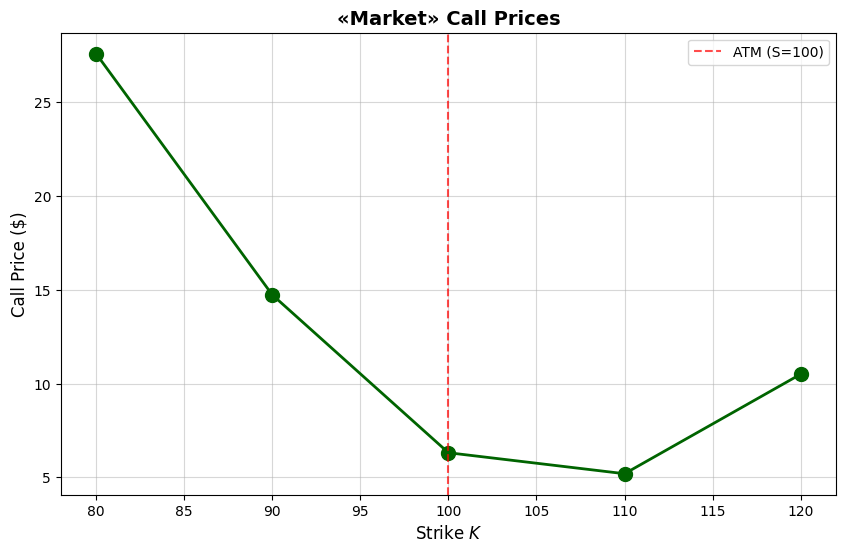

In [8]:
S0 = 100
K = [80, 90, 100, 110, 120]
T = 0.5
r = 0.05
q = 0.02


true_sigmas = [sigma_true(k) for k in K]
C_market = [bs_call(S0, k, T, r, q, ts) for k, ts in zip(K, true_sigmas)]


plt.plot(K, C_market, 'o-', linewidth=2, markersize=10, color='darkgreen')
plt.axvline(x=S0, color='red', linestyle='--', alpha=0.7, label=f'ATM (S={S0})')
plt.xlabel('Strike $K$', fontsize=12)
plt.ylabel('Call Price ($)', fontsize=12)
plt.title('«Market» Call Prices', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

**(c)**

In [9]:
tolerance = 1e-6

imp_sigmas = [implied_vol_newton(C, S0, k, T, r, q, tol=tolerance) for k, C in zip(K, C_market)]

df = pd.DataFrame({
    'Strikes': K,
    'sigma_true': true_sigmas,
    'C_market': [np.around(c, decimals=4) for c in C_market],
    'sigma_imp': imp_sigmas,
    'Tolerance satisfied': [abs(true - imp) <= tolerance for true, imp in zip(true_sigmas, imp_sigmas)]
})
df

,Strikes,sigma_true,C_market,sigma_imp,Tolerance satisfied
0,80,0.6,27.5960,0.6,True
1,90,0.3,14.7326,0.3,True
2,100,0.2,6.3076,0.2,True
3,110,0.3,5.1874,0.3,True
4,120,0.6,10.4995,0.6,True


$\textcolor{lightblue}{\textbf{Q6. (1.5 points)}}$

Simulate paths of the **Heston model** using the **Euler–Maruyama scheme**:

$$
S_{t+\Delta t} = S_t + r S_t \Delta t + \sqrt{v_t^+} S_t \sqrt{\Delta t} Z_1
$$

$$
v_{t+\Delta t} = v_t + \kappa(\theta - v_t^+) \Delta t + \xi \sqrt{v_t^+} \sqrt{\Delta t} Z_2
$$

where $v_t^+ = \max(v_t, 0)$ (truncation scheme to ensure positivity), and

$$
Z_1, Z_2 \sim \mathcal{N}(0,1), \quad \text{Cov}(Z_1, Z_2) = \rho.
$$

Use the following parameters:  
$S_0 = 100$, $v_0 = 0.04$, $\theta = 0.04$, $\kappa = 2.0$, $\xi = 0.3$, $\rho = -0.7$, $r = 0.05$, $T = 1$, $N = 252$ time steps.

(a) Simulate $M = 5000$ paths of $(S_t, v_t)$.  

(b) Plot **10 sample paths** of $S_t$ and **10 sample paths** of $\sqrt{v_t}$ (the instantaneous volatility) on separate subplots.  

(c) Compute and report the empirical mean and standard deviation of $S_T$ across all simulated paths.

$\textcolor{green}{\textbf{Solution}}$

**(a) and (b)**

In [ ]:
# Heston path imulation via Euler-Maruyama
def heston(S0, v0, kappa, theta, xi, rho, r, T, N):
    dt = T / N

    S = np.zeros(N+1)
    v = np.zeros(N+1)

    S[0] = S0
    v[0] = v0
    
    for i in range(N):
        # Correlated Brownian increments
        Z1 = np.random.randn()
        Z2 = np.random.randn()
        W1 = Z1
        W2 = rho * Z1 + np.sqrt(1-rho**2) * Z2

        # Variance
        v_i = np.maximum(v[i], 0)
        v[i+1] = np.maximum(
            v_i + kappa*(theta - v_i)*dt + xi*np.sqrt(v_i)*np.sqrt(dt)*W2,
            0
        )

        # Price
        S[i+1] = S[i] + r*S[i]*dt + np.sqrt(v_i)*S[i]*np.sqrt(dt)*W1

    return S, v

In [ ]:
# Multiple Heston paths generation
def heston_mc(S0, v0, kappa, theta, xi, rho, r, T, N, M):
    S_paths, v_paths = list(), list()

    for _ in range(M):
        S, v = heston(S0, v0, kappa, theta, xi, rho, r, T, N)
        S_paths.append(S); v_paths.append(v)
    # S and v paths stored column-wise in ((T/dt)+1) x M arrays
    S_paths = np.stack(S_paths, axis=1)
    v_paths = np.stack(v_paths, axis=1)

    #print('-> heston_mc: Paths generated') # log
    return S_paths, v_paths

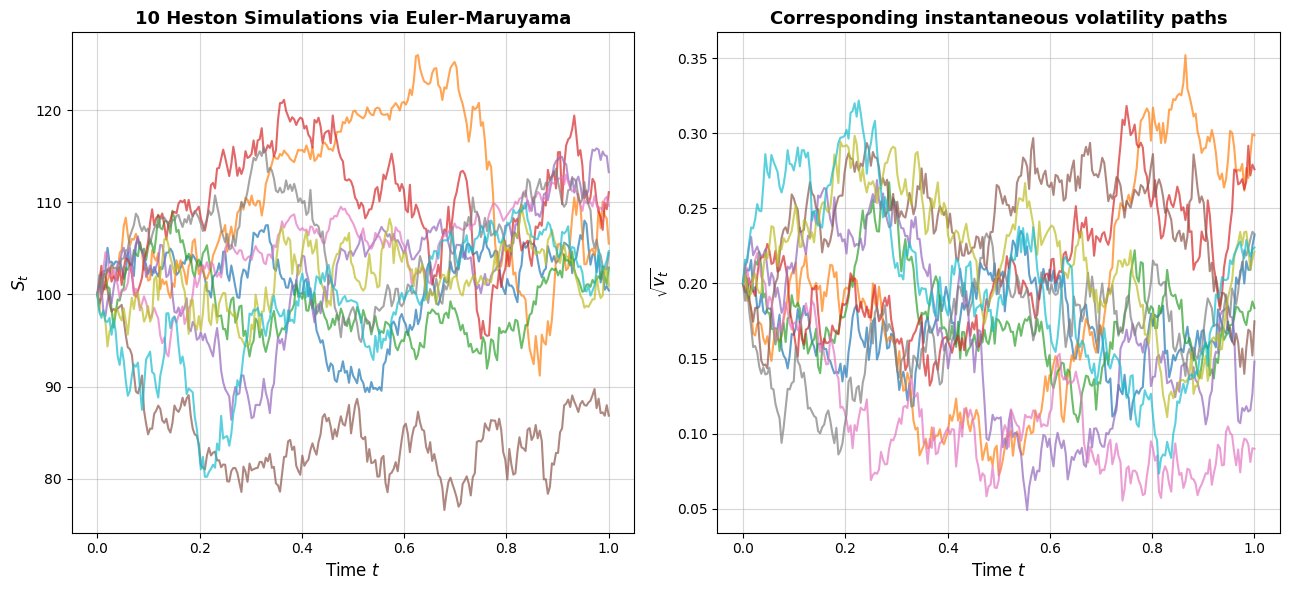

In [152]:
S0 = 100
v0 = 0.04
theta = 0.04
kappa = 2
xi = 0.3
rho = -0.7
r = 0.05
T = 1
N = 252
t = np.linspace(0, T, N+1)


S_paths, v_paths = heston_mc(S0, v0, kappa, theta, xi, rho, r, T, N, M=5000)


# Plot first 10 paths of S_t and corresponding v_t
M_sample = 10
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

for i in range(M_sample):
    axes[0].plot(t, S_paths[:, i], alpha=0.7)
axes[0].set_xlabel('Time $t$', fontsize=12)
axes[0].set_ylabel('$S_t$', fontsize=12)
axes[0].set_title('10 Heston Simulations via Euler-Maruyama', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.5)

for i in range(M_sample):
    axes[1].plot(t, np.sqrt(v_paths[:, i]), alpha=0.7)
axes[1].set_xlabel(r'Time $t$', fontsize=12)
axes[1].set_ylabel(r'$\sqrt{v_t}$', fontsize=12)
axes[1].set_title('Corresponding instantaneous volatility paths', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()

**(c)**

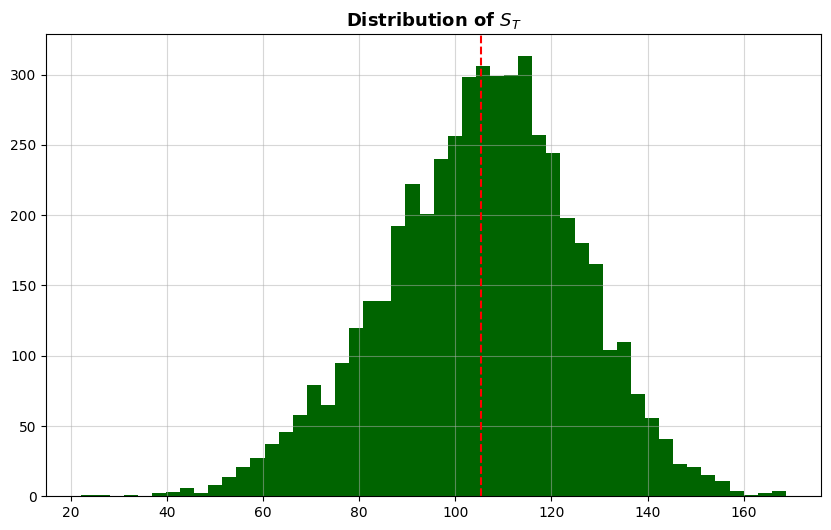

Empirical mean: 105.3369
Empirical std:	20.0105


In [153]:
S_emp_mean = np.mean(S_paths[-1, :])
S_emp_std = np.sqrt(np.var(S_paths[-1, :]))

plt.hist(S_paths[-1, :], bins=50, color='darkgreen')
plt.axvline(x=S_emp_mean, color='red', linestyle='--', label='Emperical mean')
plt.title('Distribution of $S_T$', fontsize=13, fontweight='bold')
plt.grid(alpha=0.5)
plt.show()

print(f'Empirical mean: {np.around(S_emp_mean, decimals=4)}')
print(f'Empirical std:\t{np.around(S_emp_std, decimals=4)}')

$\textcolor{lightblue}{\textbf{Q7. (1.5 points)}}$  

You are given a synthetic implied volatility surface representing market quotes. Your task is to **calibrate the Heston model** to this surface.

(a) Use the market data provided below (strikes and maturities with corresponding implied volatilities). Implement a **least-squares calibration** by minimizing:

$$
\text{Error}(\theta) = \sum_{i} \left( \sigma_{\text{model}}(K_i, T_i; \theta) - \sigma_{\text{market}}(K_i, T_i) \right)^2
$$

where $\theta = (v_0, \theta, \kappa, \xi, \rho)$.  

For simplicity, approximate $\sigma_{\text{model}}$ by simulating option prices under Heston (using Monte Carlo with the scheme from Q6), then computing implied volatility via your Newton–Raphson solver from Q5. Alternatively, you may use the Heston characteristic function if you are familiar with it (this is more advanced and optional).  

(b) Use `scipy.optimize.minimize` with bounds:  
$v_0 \in [0.01, 0.10]$, $\theta \in [0.01, 0.10]$, $\kappa \in [0.5, 5.0]$, $\xi \in [0.1, 1.0]$, $\rho \in [-0.9, 0.0]$.  

Initial guess: $v_0 = 0.04, \theta = 0.04, \kappa = 2.0, \xi = 0.3, \rho = -0.5$.  

(c) Report the calibrated parameters and the final calibration error.  

**Market data (synthetic):**

| Strike | Maturity T | Implied Vol |
|--------|------------|-------------|
| 80     | 0.25       | 0.28        |
| 90     | 0.25       | 0.24        |
| 100    | 0.25       | 0.22        |
| 110    | 0.25       | 0.24        |
| 120    | 0.25       | 0.27        |
| 80     | 0.5        | 0.27        |
| 90     | 0.5        | 0.23        |
| 100    | 0.5        | 0.21        |
| 110    | 0.5        | 0.23        |
| 120    | 0.5        | 0.26        |
| 80     | 1.0        | 0.25        |
| 90     | 1.0        | 0.22        |
| 100    | 1.0        | 0.20        |
| 110    | 1.0        | 0.22        |
| 120    | 1.0        | 0.24        |

Use $S_0 = 100$, $r = 0.05$, $q = 0.02$.

$\textcolor{green}{\textbf{Solution}}$

In [110]:
market_data = {
    'Strike': [80, 90, 100, 110, 120, 80, 90, 100, 110, 120, 80, 90, 100, 110, 120],
    'Maturity': [0.25]*5 + [0.5]*5 + [1.0]*5,
    'IV_market': [0.28, 0.24, 0.22, 0.24, 0.27, 0.27, 0.23, 0.21, 0.23, 0.26, 0.25, 0.22, 0.20, 0.22, 0.24]
}
df_market = pd.DataFrame(market_data)
df_market

,Strike,Maturity,IV_market
0,80,0.25,0.28
1,90,0.25,0.24
2,100,0.25,0.22
3,110,0.25,0.24
4,120,0.25,0.27
5,80,0.50,0.27
6,90,0.50,0.23
7,100,0.50,0.21
8,110,0.50,0.23
9,120,0.50,0.26


In [114]:
# Computes implied volatilities for given maturity, set of strikes and params using Monte Carlo (heston_mc)
def heston_ivs_mc(S0, v0, kappa, theta, xi, rho, r, q, T, N, M, strikes):
    S_T = heston_mc(S0, v0, kappa, theta, xi, rho, r, T, N, M)[0][-1, :]

    ivs = list()
    for K in strikes:
        payoffs = np.maximum(S_T - K, 0)
        price = np.exp(-r*T) * np.mean(payoffs)
        try:
            ivs.append(implied_vol_newton(price, S0, K, T, r, q))
        except ValueError:
            ivs.append(np.nan)
    
    #print('-> heston_ivs_mc: Implied volatilities computed') # log
    return np.array(ivs)

In [149]:
def calibrate_heston(
        market_data: pd.DataFrame,
        S0, r, q, N, M
    ) -> tuple:
    def objective(v0, kappa, theta, xi, rho, md_grouped) -> float:
        error = 0

        for maturity, strikes, iv_market in md_grouped:
            sigma_model = heston_ivs_mc(S0, v0, kappa, theta, xi, rho, r, q, maturity, N, M, strikes)
            for ivm in iv_market:
                error += sum((sigma_model - ivm)**2)
        
        print(f'-> objective calculated: {error}') # log
        return error

    # Initial guess
    v0 = 0.04
    kappa = 2
    theta = 0.04
    xi = 0.3
    rho = -0.5

    # Groupping by maturity is used to reduce the number of MC simulations
    md_grouped = market_data.groupby('Maturity')[['Maturity', 'Strike', 'IV_market']].apply(
        lambda g: (g.name, g['Strike'].tolist(), g['IV_market'].tolist())
    )
    
    res_params = opt.minimize(
        lambda x: objective(*x, md_grouped),
        [v0, kappa, theta, xi, rho],
        method='SLSQP',
        bounds=[(0.01, 0.1), (0.5, 5.0), (0.01, 0.1), (0.1, 1.0), (-0.9, 0.0)]
    ).x

    return res_params, objective(*res_params, md_grouped)

Ok, I drafted the solution, but it doesn't work correctly: \
function is not minimized and the initial guess doesn't change. \
I have no idea why so, could you help please 🙏🏼🙏🏼🙏🏼

Anyway, I described the idea.

In [156]:
S0 = 100
r = 0.05
q = 0.02
N = 252

# Reduce M for faster but less accurate results
fit, error = calibrate_heston(df_market, S0, r, q, N, M=5000)

print('--------------------------')
print('Calibrated parameters: v0 = {}, kappa = {}, theta = {}, xi = {}, rho = {}'.format(*fit))
print(f'Error: {np.around(error, decimals=4)}')

-> objective calculated: 0.1901017035620241
-> objective calculated: 0.2506674070173238


KeyboardInterrupt: 